# CONFIGURACIÓN DEL ENTORNO

In [1]:
! pip install --upgrade numpy

Requirement already up-to-date: numpy in /home/stylonemesis/anaconda3/lib/python3.7/site-packages (1.15.4)


In [23]:
from modelo import *
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import math
from scipy import stats

# SIMULACIÓN

Para la representación de esta gráfica decidimos usar 1000 unidades de tiempo ya que con 600 como aparece en el paper no se observaba con claridad cuando se llegaba a un estado estacionario. Hemos decidido normalizar la media de los infectados para poder comparar diferentes simulaciones con variaciones en la L.

Primero, definiremos los hiperparámetros.

## HIPERPARÁMETROS

En esta celda establecemos los parámetros que usaremos en las futuras simulaciones:

In [11]:
nsimulaciones = 50
max_time=1000
C=0.2
L=50
p=0.5
pr=0.1
ps=0.05 

## Problemas con la normalización de resultados

Al principio hemos guardado varias medias y las desviaciones típicas de diferentes tamaños de simulaciones sin distinguir si la epidemia se erradicaba durante la simulación. Debido a esto, las diferentes pruebas nos han dado resultados diferentes. Esto puede ser debido a que hay una probabilidad considerable de que la epidemia termine antes de la simulación y por tanto afecta a nuestros cálculos. Usamos la siguiente celda para la colección de estadísticas.

Simulación de todas las epidemias (La simulación **SI** hace break):

Simulacion 1
Simulacion 2
Simulacion 3
Simulacion 4
Simulacion 5
Simulacion 6
Simulacion 7
Simulacion 8
Simulacion 9
Simulacion 10
Simulacion 11
Simulacion 12
Simulacion 13
Simulacion 14
Simulacion 15
Simulacion 16
Simulacion 17
Simulacion 18
Simulacion 19
Simulacion 20
Simulacion 21
Simulacion 22
Simulacion 23
Simulacion 24
Simulacion 25
Simulacion 26
Simulacion 27
Simulacion 28
Simulacion 29
Simulacion 30
Simulacion 31
Simulacion 32
Simulacion 33
Simulacion 34
Simulacion 35
Simulacion 36
Simulacion 37
Simulacion 38
Simulacion 39
Simulacion 40
Simulacion 41
Simulacion 42
Simulacion 43
Simulacion 44
Simulacion 45
Simulacion 46
Simulacion 47
Simulacion 48
Simulacion 49
Simulacion 50


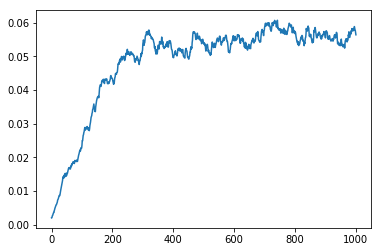

In [4]:
np.random.seed(seed=None)  # seed for reproducibility
stats = np.array([],dtype=float)


tiemposBreak = []
indicesBreak = []

for n in range(0, nsimulaciones):
	print("Simulacion",str(n+1))
	evolution_infected, evolution_susceptible = simulation(max_time, C, L, p, pr, ps)
	if len(evolution_infected) < max_time:
		#indicesBreak.append(n)
		#tiemposBreak.append(len(evolution_infected))
		zeros = np.zeros((max_time+1)-len(evolution_infected))
		zeros2 = np.append(np.asarray(evolution_infected), zeros)
		evolution_infected = zeros2.tolist()
	#print(evolution_infected)
	if n == 0:
		stats = np.append(stats, evolution_infected)
	else:
		stats = np.vstack((stats,evolution_infected))
medias = []
varianzas = []
for k in range(0, max_time+1):
	medias.append(np.mean(stats, axis=0)[k])
	varianzas.append(np.std(stats, axis=0)[k])


plt.plot(medias)
plt.show()  

In [29]:
stats1 = np.load("s50t800c02l50.npy")
stats2 = np.load("s50t1000c02l30.npy")
stats3 = np.load("s50t1000c02l50.npy")

mean1 = np.mean(stats1, axis=0)
std1 = np.std(stats1, axis=0)

mean2 = np.mean(stats2, axis=0)
std2 = np.std(stats2, axis=0)

mean3 = np.mean(stats3, axis=0)
std3 = np.std(stats3, axis=0)


In [30]:
 
mean1 = np.array(mean1)
std1 = np.array(std1)

mean2 = np.array(mean2)
std2 = np.array(std2)

mean3 = np.array(mean3)
std3 = np.array(std3)

Utilizamos una regresión logística para eliminar el ruido de nuestros resultados:

In [31]:
time1 = np.array(list(range(801)))
time2 = np.array(list(range(1001)))

mean_norm1 = lowess(mean1, time1, frac=0.33)
std_norm1 = lowess(std1, time1, frac=0.33)

mean_norm2 = lowess(mean2, time2, frac=0.33)
std_norm2 = lowess(std2, time2, frac=0.33)

mean_norm3 = lowess(mean3, time2, frac=0.33)
std_norm3 = lowess(std3, time2, frac=0.33)

Resultados mal normalizados:

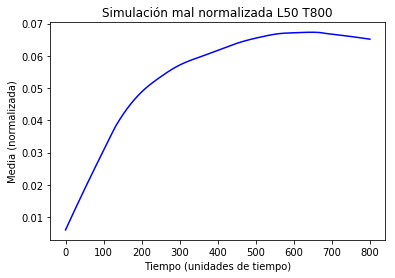

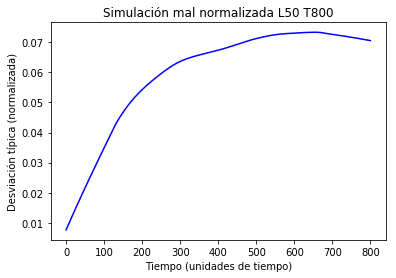

In [32]:
plt.plot(mean_norm1[:,0], mean_norm1[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada)')
plt.title("Simulación mal normalizada L50 T800")
plt.show()

plt.plot(std_norm1[:,0], std_norm1[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Desviación típica (normalizada)')
plt.title("Simulación mal normalizada L50 T800")
plt.show()

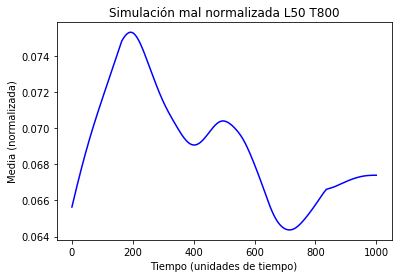

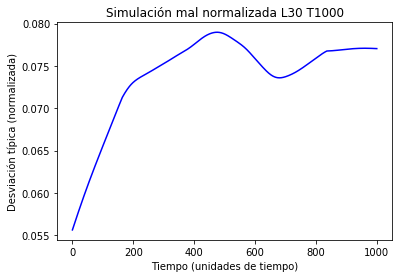

In [33]:
plt.plot(mean_norm2[:,0], mean_norm2[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada)')
plt.title("Simulación mal normalizada L50 T800")
plt.show()

plt.plot(std_norm2[:,0], std_norm2[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Desviación típica (normalizada)')
plt.title("Simulación mal normalizada L30 T1000")
plt.show()

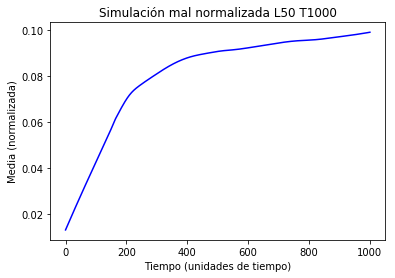

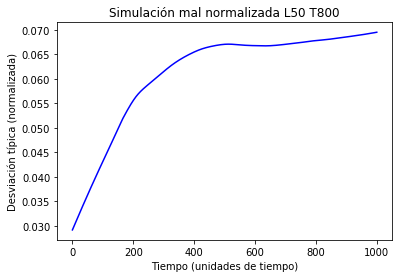

In [34]:
plt.plot(mean_norm3[:,0], mean_norm3[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada)')
plt.title("Simulación mal normalizada L50 T1000")
plt.show()

plt.plot(std_norm3[:,0], std_norm3[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Desviación típica (normalizada)')
plt.title("Simulación mal normalizada L50 T800")
plt.show()

## Usando sólo simulaciones con epidemias supervivientes

En la realización de estas simulaciones no estamos teniendo en cuenta todas aquellas simulaciones que se mueren debido a que el número de infectados llega a 0 en algún momento.

Simulación de epidemias supervivientes (La simulación **NO** hace break):

Simulacion 1
Simulacion 2
Simulacion 3
Simulacion 3
Simulacion 3
Simulacion 3
Simulacion 4
Simulacion 4
Simulacion 5
Simulacion 5
Simulacion 5
Simulacion 6
Simulacion 7
Simulacion 8
Simulacion 9
Simulacion 9
Simulacion 10
Simulacion 10
Simulacion 10
Simulacion 11
Simulacion 12
Simulacion 13
Simulacion 14
Simulacion 15
Simulacion 16
Simulacion 17
Simulacion 18
Simulacion 19
Simulacion 19
Simulacion 20
Simulacion 20
Simulacion 21
Simulacion 21
Simulacion 21
Simulacion 22
Simulacion 23
Simulacion 23
Simulacion 24
Simulacion 24
Simulacion 24
Simulacion 24
Simulacion 24
Simulacion 24
Simulacion 25
Simulacion 25
Simulacion 25
Simulacion 25
Simulacion 25
Simulacion 26
Simulacion 26
Simulacion 27
Simulacion 28
Simulacion 29
Simulacion 30
Simulacion 31
Simulacion 32
Simulacion 33
Simulacion 33
Simulacion 34
Simulacion 35
Simulacion 36
Simulacion 36
Simulacion 36
Simulacion 37
Simulacion 37
Simulacion 37
Simulacion 38
Simulacion 38
Simulacion 38
Simulacion 39
Simulacion 40
Simulacion 41
Simulaci

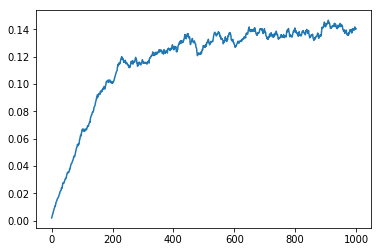

In [21]:
np.random.seed(seed=None)  # seed for reproducibility
stats = np.array([],dtype=float)


tiemposBreak = []
indicesBreak = []

n = 0

while n < nsimulaciones:
  
    print("Simulacion",str(n+1))
    evolution_infected, evolution_susceptible = simulation(max_time, C, L, p, pr, ps)
    if len(evolution_infected) >= max_time:
      if n == 0:
        stats = np.append(stats, evolution_infected)
      else:
        stats = np.vstack((stats,evolution_infected))
      n += 1
      
medias = []
varianzas = []
for k in range(0, max_time+1):
	medias.append(np.mean(stats, axis=0)[k])
	varianzas.append(np.std(stats, axis=0)[k])


plt.plot(medias)
plt.show()  

Resultado de simulaciones bien normalizadas:

In [26]:
stats4 = np.load("ESs50t1000c02l30.npy")
stats5 = np.load("ESs50t1000c02l50.npy")

mean4= np.mean(stats4, axis=0)
std4 = np.std(stats4, axis=0)


mean5 = np.mean(stats5, axis=0)
std5= np.std(stats5, axis=0)

  
mean4 = np.array(mean4)
std4 = np.array(std4)

mean5 = np.array(mean5)
std5 = np.array(std5)

time = np.array(list(range(1001)))

mean_norm4 = lowess(mean4, time, frac=0.33)
std_norm4 = lowess(std4, time, frac=0.33)

mean_norm5 = lowess(mean5, time, frac=0.33)
std_norm5 = lowess(std5, time, frac=0.33)


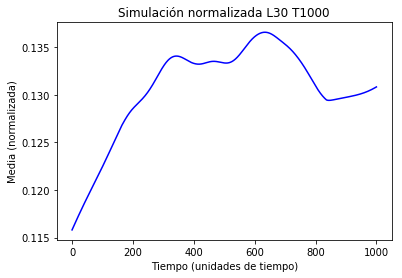

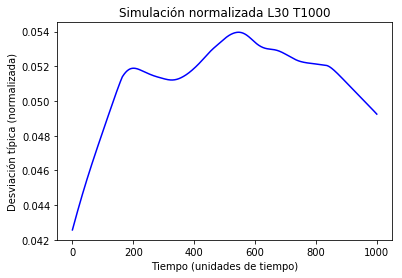

In [27]:
plt.plot(mean_norm4[:,0], mean_norm4[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada)')
plt.title("Simulación normalizada L30 T1000")
plt.show()

plt.plot(std_norm4[:,0], std_norm4[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Desviación típica (normalizada)')
plt.title("Simulación normalizada L30 T1000")
plt.show()

Con L = 30 las simulaciones tienen un tamaño demasiado pequeño para tener unos resultados viables. Esto puede ser debido a que aunque la densidad de población sea la misma, el hecho de que el porcentaje de infectados respecto a la población sea notable, el numero de futuros infectados disminuye debido a reducción de susceptibles. A continuación probamos con L= 50:

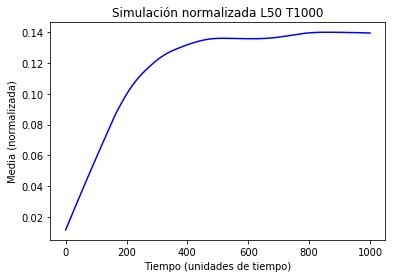

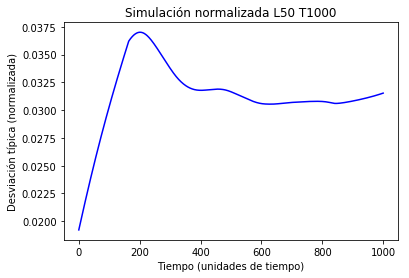

In [28]:
plt.plot(mean_norm5[:,0], mean_norm5[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada)')
plt.title("Simulación normalizada L50 T1000")
plt.show()

plt.plot(std_norm5[:,0], std_norm5[:,1], 'b')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Desviación típica (normalizada)')
plt.title("Simulación normalizada L50 T1000")
plt.show()

Estos sí son los resultados esperados del paper.



Se observa que el estado estacionario llega en las 600 unidades de tiempo, con un valor de infectados del 14% de la población total. Si comparamos estos datos con los del paper, en éste último se observa que el estado estacionario llega bastante antes de las 600 unidades de tiempo, llega aproximadamente a las 300 unidades de tiempo. Puede que esto ocurra  porque el paper considera que si se pueden hacer saltos aunque estos supongan salirse de la matriz del grafo, moviéndose hasta el extremo contrario, lo que facilitaría el contagio.


Por último, para la representación final hemos decidido expresar en la gráfica un intervalo de confianza del 95% que indica los valores hasta donde puede variar el número de infectados según la simulación.

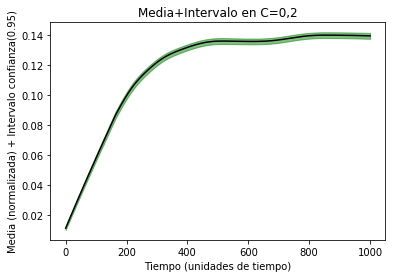

In [24]:
time = np.array(list(range(1000+1)))
medias = stats5.mean (axis=0, dtype=np.float64)
varianzas = stats5.std (axis=0, ddof=1)

mean_t = lowess(medias, time, frac=0.33,return_sorted=False)
sem = lowess(varianzas, time, frac=0.33,return_sorted=False)/math.sqrt(1000+1)
# Estadisticos


std_t = lowess(varianzas, time, frac=0.33,return_sorted=False)
cv_t = std_t / mean_t
    
# Confidence mean interval, CI 
confidence = 0.95
n = len(mean_t)
    
h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
start = mean_t - h
end = mean_t + h

plt.fill_between(range(mean_t.shape[0]), end, start, color='g', alpha=0.5)
plt.plot(mean_t, color='k')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada) + Intervalo confianza(0.95)')
plt.title('Media+Intervalo en C=0,2')
plt.show()




Si esta misma simulación la realizamos con C=0,1 y 100 simulaciones pudimos observar que si eliminábamos todas aquellas simulaciones que morían en algún momento no conseguíamos datos suficientes para analizar nada. Esto se debe a que con una densidad tan baja de población la simulación muere en la gran mayoría de los casos.

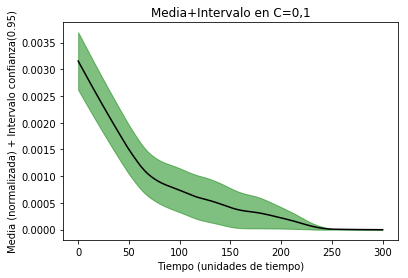

In [25]:
a = np.load("s100t300c01l50.npy")

# normaliza los datos
time = np.array(list(range(300+1)))
medias = a.mean (axis=0, dtype=np.float64)
varianzas = a.std (axis=0, ddof=1)

mean_t = lowess(medias, time, frac=0.33,return_sorted=False)
sem = lowess(varianzas, time, frac=0.33,return_sorted=False)/math.sqrt(300+1)
# Estadisticos


std_t = lowess(varianzas, time, frac=0.33,return_sorted=False)
cv_t = std_t / mean_t
    
# Confidence mean interval, CI 
confidence = 0.95
n = len(mean_t)
    
h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
start = mean_t - h
end = mean_t + h

plt.fill_between(range(mean_t.shape[0]), end, start, color='g', alpha=0.5)
plt.plot(mean_t, color='k')
plt.xlabel('Tiempo (unidades de tiempo)')
plt.ylabel('Media (normalizada) + Intervalo confianza(0.95)')
plt.title('Media+Intervalo en C=0,1')
plt.show()

Se observa que al ir avanzando el tiempo, y al ser una densidad tan baja el número de infectados va decreciendo hasta llegar a prácticamente a 0 infectados. El tiempo estacionario se da en 250 con un número ínfimo de infectados. La gráfica debería subir en los primero tiempos ligeramente pero debido al suavizado esto no se puede observar. El tiempo de respuesta, tomado como Testacionario/2 es de 125. Si comparamos estos datos con los del paper podemos observar que el estado estacionario y el tiempo de respuesta son de 300 y 150 respectivamente, esto se debe a que, de nuevo, estará usando unas condiciones de saltos diferentes, podrá saltar fuera de la matriz moviéndose al extremo contrario.